In [59]:
from matplotlib import pyplot as plt
import numpy as np

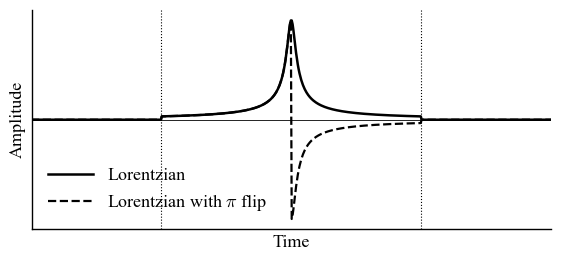

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# --- Paper-style rcParams ---
mpl.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman", "Times", "Computer Modern Roman"],
    "mathtext.fontset": "cm",
    "font.size": 13,
    "axes.linewidth": 1.0,
    "xtick.direction": "out",
    "ytick.direction": "in",
    "xtick.major.size": 0,
    "ytick.major.size": 0,
    "xtick.minor.size": 0,
    "ytick.minor.size": 0,
    "xtick.labelbottom": False,
    "ytick.labelleft": False,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.spines.bottom": True,
    "axes.spines.left": True,
})

# --- Define parameters ---
x = np.linspace(-10, 10, 2000)
gamma = 0.05
x0 = 0.0

# Cutoff window
x_start = -1.5
x_end   =  1.5
window = ((x >= x_start) & (x <= x_end)).astype(float)

# Lorentzian (yours, with sqrt)
lorentzian = 1 / (1 + ((x - x0) / gamma) ** 2) ** (1 / 2)

# Apply cutoff
lorentzian_cut = lorentzian * window

# Lorentzian with sign flip at center
lorentzian_flip_cut = lorentzian_cut.copy()
lorentzian_flip_cut[x >= x0] *= -1

# --- Plot ---
fig, ax = plt.subplots(figsize=(5.8, 2.8))

ax.plot(
    x, lorentzian_cut,
    color="black",
    linewidth=1.8,
    label="Lorentzian"
)

ax.plot(
    x, lorentzian_flip_cut,
    color="black",
    linestyle="--",
    linewidth=1.6,
    label=r"Lorentzian with $\pi$ flip"
)

# Zero line
ax.axhline(0, color="black", linewidth=0.6)

# Visualize cutoff edges (optional but very paper-like)
ax.axvline(x_start, color="black", linestyle=":", linewidth=0.8)
ax.axvline(x_end,   color="black", linestyle=":", linewidth=0.8)

# Labels
ax.set_xlabel(r"Time")
ax.set_ylabel(r"Amplitude")

# Limits
ax.set_xlim(-3, 3)
ax.set_ylim(-1.1, 1.1)

# Ticks
ax.minorticks_on()

# Legend
ax.legend(
    frameon=False,
    loc="lower left",
    handlelength=2.5,
)

# x = np.linspace(x_end, x_end+1, 2000)

# # Define square measurement pulse
# square = 0.2*((x >= x_end) & (x <= x_end+1)).astype(float)
# ax.fill_between(x, square, alpha=0.7, color="green", label="Square measurement pulse")

# Add square measurement pulse in green
# ax.plot(
#     x, 
#     square,
#     color="green",
#     linewidth=1.8,
#     label="Square measurement pulse"
# )

plt.tight_layout()
plt.savefig("lorentzian_cutoff_with_sign_flip.png", dpi=300)
plt.show()

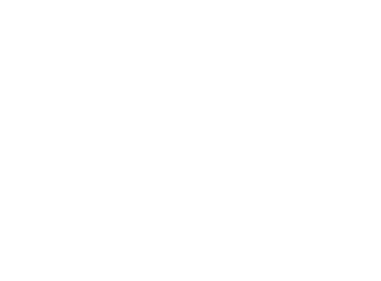

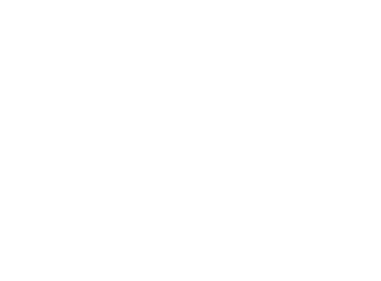

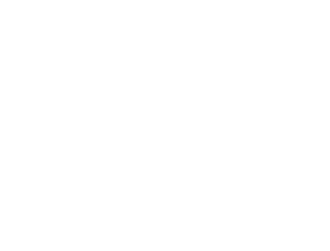

In [70]:

# Create first figure: Lorentzian pulse
fig1, ax1 = plt.subplots(figsize=(4, 3))
ax1.set_facecolor('black')
ax1.set_xlim(-1.6, 1.6)
ax1.set_ylim(-1.1, 1.1)
ax1.axis('off')
ax1.plot(x, lorentzian_cut, color='white', linewidth=10)
plt.tight_layout()
plt.show()

# Create second figure: Lorentzian with sign flip
fig2, ax2 = plt.subplots(figsize=(4, 3))
ax2.set_facecolor('black')
ax2.set_xlim(-1.6, 1.6)
ax2.set_ylim(-1.1, 1.1)
ax2.axis('off')
ax2.plot(x, lorentzian_flip_cut, color='white', linewidth=10)
plt.tight_layout()
plt.show()


square = 0.2 * ((x >= -1) & (x <= 1)).astype(float)
fig3,ax3 = plt.subplots(figsize=(4, 3))
ax3.set_facecolor('black')
ax3.set_xlim(-1.6, 1.6)
ax3.set_ylim(-1.1, 1.1)
ax3.axis('off')
ax3.plot(x, square, color='white', linewidth=10)

# Save figures with transparent background
fig1.savefig("lorentzian_pulse_transparent.svg", transparent=True, bbox_inches='tight')
fig2.savefig("lorentzian_flip_pulse_transparent.svg", dpi=30, transparent=True)
fig3.savefig("square_measurement_pulse_transparent.svg", dpi=30, transparent=True)